In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from functions.stock import download_stock_data
from const.interval import Interval

In [2]:
#codigos_de_negociacao = ["BBAS3.SA", "PETR4.SA", "VALE3.SA"]

stock_data = download_stock_data("BBAS3.SA", Interval.DAY.value, 365)

[*********************100%***********************]  1 of 1 completed


In [3]:
df_bbas3 = stock_data

df_bbas3['Adj Close_next_day'] = stock_data['Adj Close'].shift(-1)

In [4]:
df_bbas3 = df_bbas3.drop(df_bbas3.index[-1])
df_bbas3.dropna

<bound method DataFrame.dropna of                  Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2023-02-06  39.070000  39.720001  38.619999  39.419998  36.380760  13656900   
2023-02-07  39.590000  39.680000  38.459999  38.880001  35.882393  12441900   
2023-02-08  39.169998  39.950001  38.910000  39.799999  36.731464  22242800   
2023-02-09  39.930000  40.070000  39.130001  39.590000  36.537655  10654600   
2023-02-10  39.349998  40.610001  38.939999  40.369999  37.257523  14915700   
...               ...        ...        ...        ...        ...       ...   
2024-01-26  56.639999  56.990002  56.549999  56.970001  56.970001   8196100   
2024-01-29  56.959999  57.029999  56.060001  56.520000  56.520000   5632300   
2024-01-30  56.490002  56.500000  55.950001  56.230000  56.230000   5929900   
2024-01-31  56.400002  56.840000  56.119999  56.450001  56.450001   6556000   
2024-02-01  56.450

In [5]:
display(df_bbas3)

,Open,High,Low,Close,Adj Close,Volume,Adj Close_next_day
Date,,,,,,,
2023-02-06,39.070000,39.720001,38.619999,39.419998,36.380760,13656900,35.882393
2023-02-07,39.590000,39.680000,38.459999,38.880001,35.882393,12441900,36.731464
2023-02-08,39.169998,39.950001,38.910000,39.799999,36.731464,22242800,36.537655
2023-02-09,39.930000,40.070000,39.130001,39.590000,36.537655,10654600,37.257523
2023-02-10,39.349998,40.610001,38.939999,40.369999,37.257523,14915700,37.469784
...,...,...,...,...,...,...,...
2024-01-26,56.639999,56.990002,56.549999,56.970001,56.970001,8196100,56.520000
2024-01-29,56.959999,57.029999,56.060001,56.520000,56.520000,5632300,56.230000
2024-01-30,56.490002,56.500000,55.950001,56.230000,56.230000,5929900,56.450001


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = df_bbas3.iloc[:, 1:-1] # Todas as colunas, exceto a última e a priemira
y = df_bbas3.iloc[:, -1] # Última coluna

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [8]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = regression_model.predict(X_test)

In [10]:
from functions.validation import performance_evaluation
test_performance = performance_evaluation(y_test, y_pred)

print("\nPerformance no Conjunto de Teste:")
for metric, value in test_performance.items():
    print(f'{metric}: {value}')


Performance no Conjunto de Teste:
Mean Squared Error (MSE): 0.4779509060339915
Median Absolute Deviation (MAD): 0.4696753918211556
Mean Absolute Error (MAE): 0.53610213183133
R-squared (R²): 0.9865935462679938


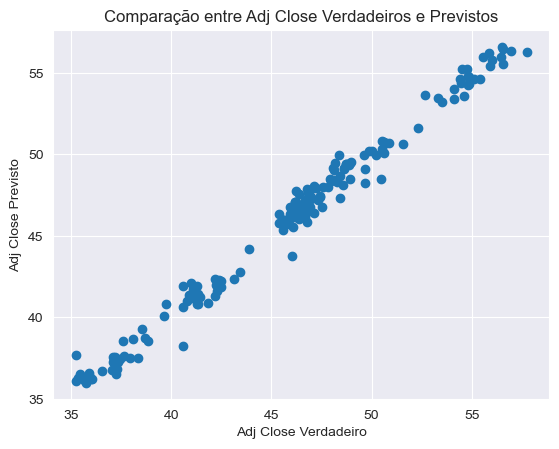

In [11]:
plt.scatter(y_test, y_pred)
plt.xlabel("Adj Close Verdadeiro")
plt.ylabel("Adj Close Previsto")
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")
plt.show()

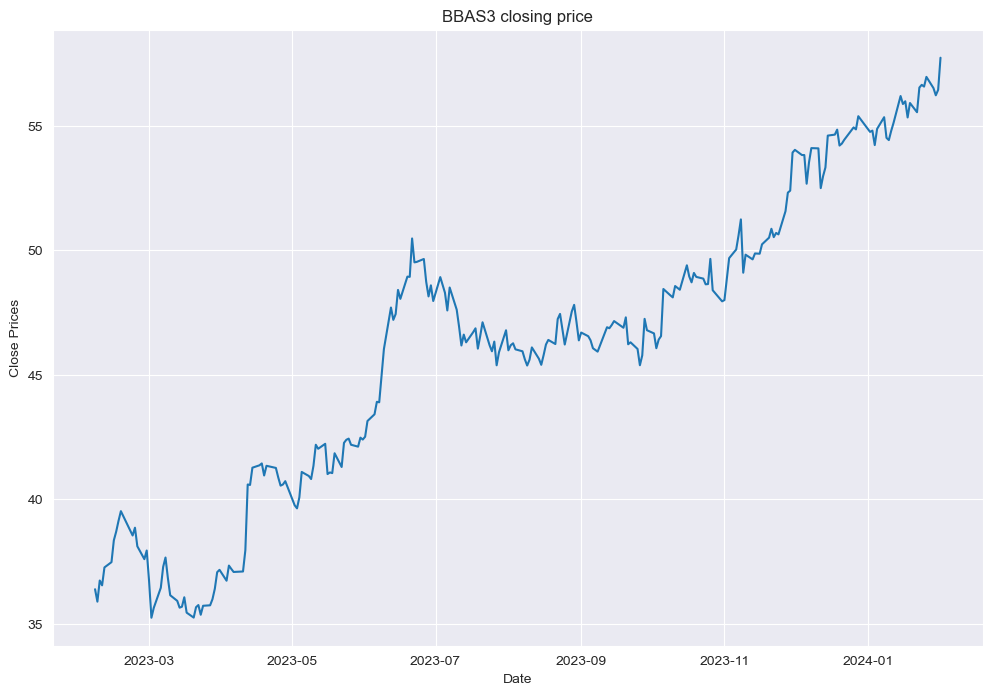

In [12]:
#plot close price
plt.figure(figsize=(12,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_bbas3['Adj Close'])
plt.title('BBAS3 closing price')
plt.show()

In [13]:
y_pred_df = pd.DataFrame({"Close":y_pred}, index=y_test.index)

In [14]:

plt.plot(y_test.index ,y_test.value, alpha=0.75, c='b')
plt.plot(y_test.index, y_pred, alpha=0.75, c='g')
plt.title("Comparação entre Adj Close Verdadeiros e Previstos")
plt.legend()
plt.show()

AttributeError: 'Series' object has no attribute 'value'

In [15]:
#Implementação usando Pandas
y_test_list = []
pred_list = []
window_size = 60

for window in df_bbas3.rolling(window=window_size):
    
    if len(window) == window_size:
        # Separe os dados em X e y
        X_window = window.iloc[:, 1:-1] # Todas as colunas, exceto a última e a priemira
        y_window = window.iloc[:, -1] #Última coluna    
    
        X_train_window, X_test_window, y_train_window, y_test_window = (
            train_test_split(X_window, y_window, test_size=0.3, random_state=5))
        
        # Inicialização e ajuste do modelo de regressão linear
        regression_model_window = LinearRegression()
        regression_model_window.fit(X_train_window, y_train_window)
        
        # Previsões
        y_pred_window = regression_model_window.predict(X_test_window)
        
        # DataFrame temporário com as previsões
        df_temporario = pd.DataFrame({'Close': y_pred_window})
        
        # Adicionando o DataFrame temporário à lista
        pred_list.append(df_temporario)
        y_test_list.append(y_test_window)
    
    
    
predictions = pd.concat(pred_list, ignore_index=True)
y_tests = pd.concat(y_test_list, ignore_index=True)
predictions = predictions.drop_duplicates()

In [16]:
test_performance = performance_evaluation(y_tests, predictions)

print("\nPerformance no Conjunto de Teste:")
for metric, value in test_performance.items():
    print(f'{metric}: {value}')


Performance no Conjunto de Teste:
Mean Squared Error (MSE): 0.5002932924710249
Median Absolute Deviation (MAD): 0.41356356259506555
Mean Absolute Error (MAE): 0.5313145373336544
R-squared (R²): 0.9757756082782931


In [125]:
#Implementação usando Python 
window_size = 60
y_test_list = []
pred_list = []


# Loop para deslizar a janela ao longo dos dados
for i in range(len(df_bbas3) - window_size + 1):
    # Janela de dados
    window_data = df_bbas3.iloc[i:i + window_size]
    
    
    # Separação os dados em X e y
    X_window = window_data.iloc[:, 1:-1]
    y_window = window_data.iloc[:, -1]
    
    # Divisão os dados em conjuntos de treino e teste
    X_train_window, X_test_window, y_train_window, y_test_window = train_test_split(
        X_window, y_window, test_size=0.7, random_state=42)
    
    # Inicialização e ajuste do modelo de regressão linear
    regression_model_window = LinearRegression()
    regression_model_window.fit(X_train_window, y_train_window)
    
    # Previsões
    y_pred_window = regression_model_window.predict(X_test_window)
    
    # DataFrame temporário com as previsões
    df_temporario = pd.DataFrame({'Close': y_pred_window})
    
    # Adicionando o DataFrame temporário à lista
    pred_list.append(df_temporario)
    y_test_list.append(y_test_window)




predictions = pd.concat(pred_list, ignore_index=True)
y_tests = pd.concat(y_test_list, ignore_index=True)
display(predictions)
display(y_tests)

,Close
0,37.078414
1,36.036952
2,35.862332
3,37.980374
4,38.478186
...,...
7891,55.188550
7892,54.689779
7893,54.135825
7894,54.824110


0       37.663597
1       36.380760
2       35.355404
3       37.198711
4       39.131012
          ...    
7891    54.759998
7892    54.439999
7893    52.500000
7894    54.880001
7895    47.950447
Name: Adj Close_next_day, Length: 7896, dtype: float64

In [126]:
test_performance = performance_evaluation(y_tests, predictions)

print("\nPerformance no Conjunto de Teste:")
for metric, value in test_performance.items():
    print(f'{metric}: {value}')


Performance no Conjunto de Teste:
Mean Squared Error (MSE): 0.6897498757717417
Median Absolute Deviation (MAD): 0.48217827208595665
Mean Absolute Error (MAE): 0.6237433150922262
R-squared (R²): 0.9681647815725142


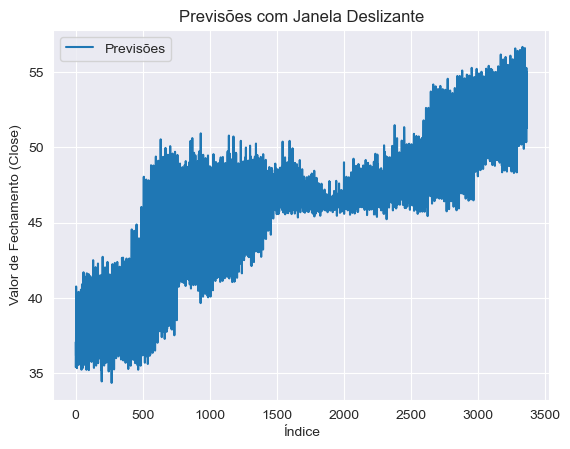

In [17]:
# Plotar os valores de 'Close'
plt.plot(predictions['Close'], label='Previsões')

# Configurar rótulos e título
plt.xlabel('Índice')
plt.ylabel('Valor de Fechamento (Close)')
plt.title('Previsões com Janela Deslizante')
plt.legend()

# Exibir o gráfico
plt.show()